# Data Science Playground - Getting Started

This notebook provides a quick introduction to the data science playground. We'll explore sample data, create visualizations, and perform basic analyses.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path to import our utilities
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

from utils import load_sample_data, setup_plotting_style, display_data_info

# Setup plotting style
setup_plotting_style()

print("✅ All libraries imported successfully!")


Plotting style configured!
✅ All libraries imported successfully!


## 1. Load and Explore Sample Data


In [3]:
# Load sample data
df = load_sample_data()

# Display information about the dataset
display_data_info(df)

# Show first few rows
print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()


DATA OVERVIEW
Shape: (1000, 4)
Memory usage: 0.03 MB

------------------------------------------------------------
COLUMN INFO
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1000 non-null   int64  
 1   income           1000 non-null   float64
 2   education_years  1000 non-null   int64  
 3   satisfaction     1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB
None

------------------------------------------------------------
STATISTICAL SUMMARY
------------------------------------------------------------
               age        income  education_years  satisfaction
count  1000.000000   1000.000000      1000.000000   1000.000000
mean     49.857000  50678.036054        15.569000      5.390000
std      18.114267  16015.803326        

,age,income,education_years,satisfaction
0,56,70585.666948,13,6
1,69,39833.208605,13,9
2,46,67302.978080,19,2
3,32,44374.840574,15,1
4,60,39587.810697,19,6


## 2. Data Visualization


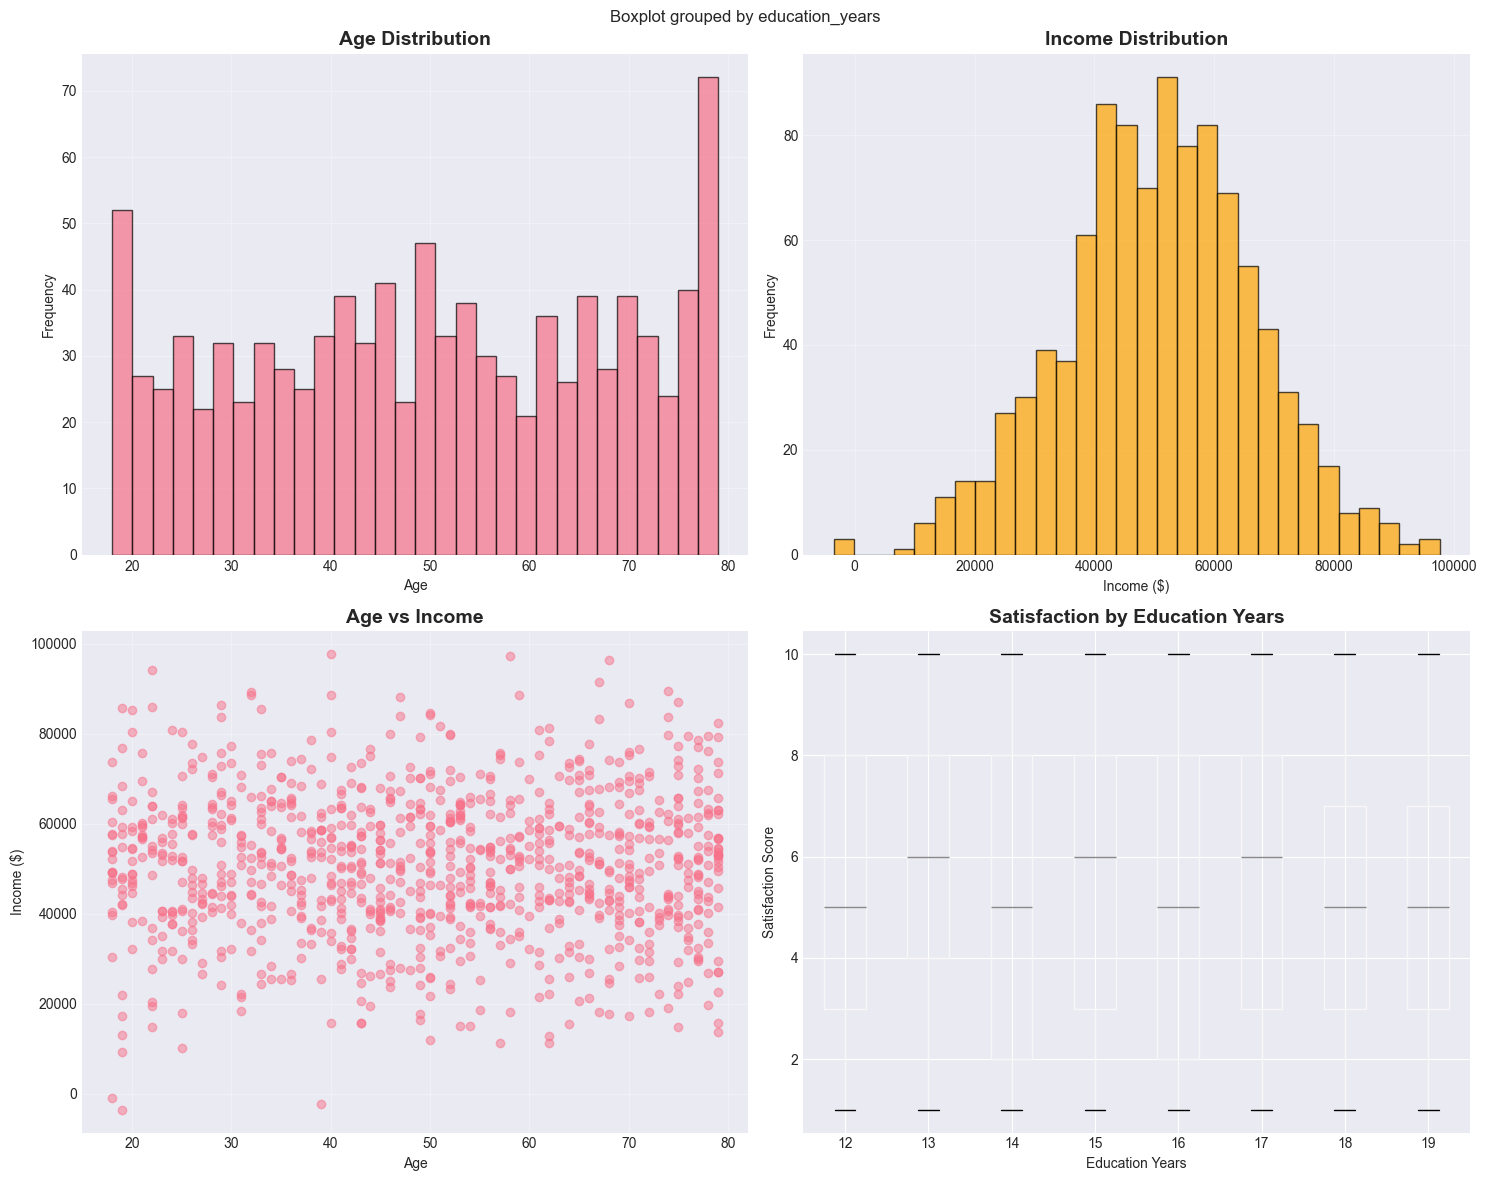

✅ Plots saved to plots/exploratory_plots.png


In [4]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of age
axes[0, 0].hist(df['age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Distribution of income
axes[0, 1].hist(df['income'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Income Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Income ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Scatter plot: Age vs Income
axes[1, 0].scatter(df['age'], df['income'], alpha=0.5)
axes[1, 0].set_title('Age vs Income', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Income ($)')
axes[1, 0].grid(True, alpha=0.3)

# Box plot: Satisfaction by Education
df.boxplot(column='satisfaction', by='education_years', ax=axes[1, 1])
axes[1, 1].set_title('Satisfaction by Education Years', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Education Years')
axes[1, 1].set_ylabel('Satisfaction Score')

plt.tight_layout()
plt.savefig('../plots/exploratory_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Plots saved to plots/exploratory_plots.png")


## 3. Correlation Analysis


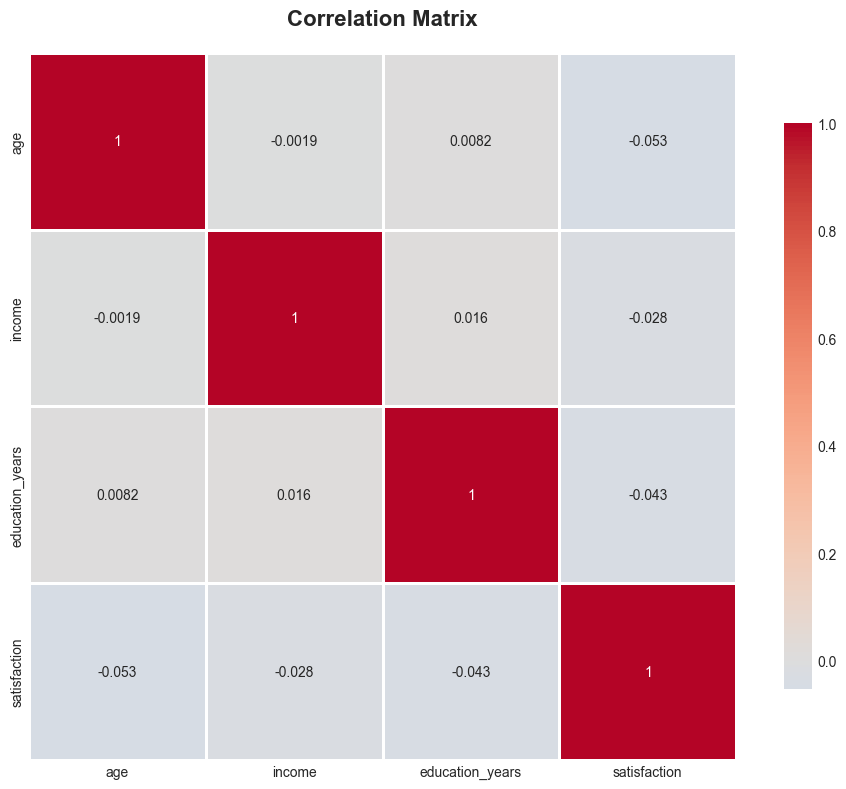

✅ Correlation heatmap saved to plots/correlation_heatmap.png

CORRELATION VALUES
                      age    income  education_years  satisfaction
age              1.000000 -0.001864         0.008169     -0.052803
income          -0.001864  1.000000         0.015684     -0.027735
education_years  0.008169  0.015684         1.000000     -0.042886
satisfaction    -0.052803 -0.027735        -0.042886      1.000000


In [5]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Correlation heatmap saved to plots/correlation_heatmap.png")

# Display correlation values
print("\n" + "=" * 60)
print("CORRELATION VALUES")
print("=" * 60)
print(correlation_matrix)


## 4. Basic Statistical Analysis


In [6]:
# Statistical analysis
from scipy import stats

print("=" * 60)
print("STATISTICAL HYPOTHESIS TEST")
print("=" * 60)
print("\nTesting if there's a significant correlation between age and income...\n")

# Perform Pearson correlation test
correlation_coef, p_value = stats.pearsonr(df['age'], df['income'])

print(f"Correlation Coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")

# Additional insights
print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)
print(f"Average Age: {df['age'].mean():.2f} years")
print(f"Average Income: ${df['income'].mean():,.2f}")
print(f"Average Satisfaction: {df['satisfaction'].mean():.2f}/10")
print(f"Average Education: {df['education_years'].mean():.2f} years")


STATISTICAL HYPOTHESIS TEST

Testing if there's a significant correlation between age and income...

Correlation Coefficient: -0.0019
P-value: 0.9530
Significant at α=0.05: No

KEY INSIGHTS
Average Age: 49.86 years
Average Income: $50,678.04
Average Satisfaction: 5.39/10
Average Education: 15.57 years


## 5. Machine Learning - Simple Model


MODEL PERFORMANCE
R² Score: 0.0019
RMSE: $15,997.12

FEATURE COEFFICIENTS
age: -10.26
education_years: 62.69
satisfaction: -86.30


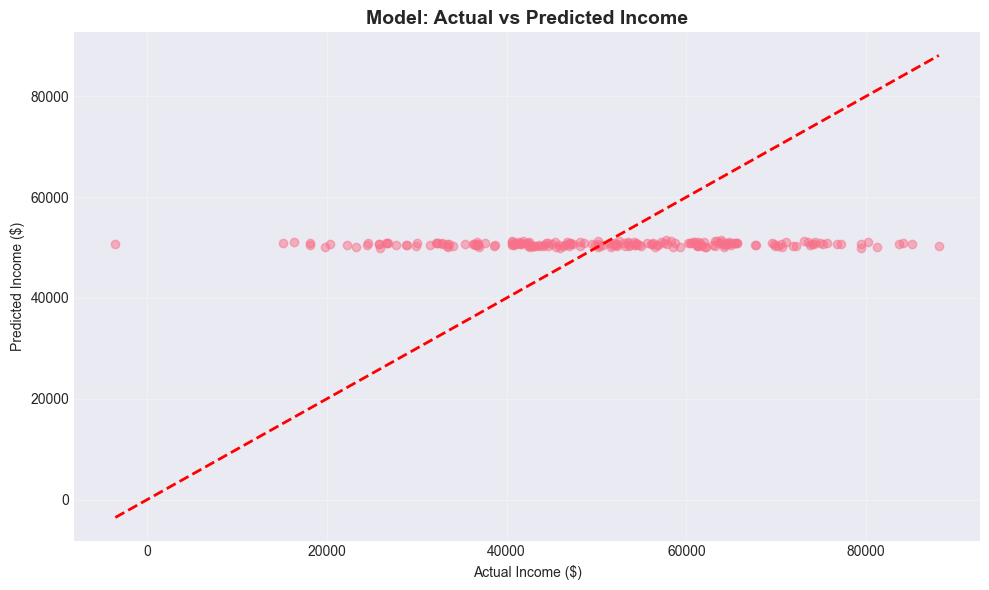


✅ Model visualization saved to plots/model_predictions.png


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data for modeling: predict income based on other features
X = df[['age', 'education_years', 'satisfaction']]
y = df['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:,.2f}")

print("\n" + "=" * 60)
print("FEATURE COEFFICIENTS")
print("=" * 60)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Income ($)')
plt.ylabel('Predicted Income ($)')
plt.title('Model: Actual vs Predicted Income', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../plots/model_predictions.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Model visualization saved to plots/model_predictions.png")


---

## 🎉 Congratulations!

You've completed the getting started tutorial. Feel free to:
- Modify the data generation to create different datasets
- Add more features and visualizations
- Experiment with different machine learning models
- Try new analysis techniques

**Happy Data Exploring! 🚀**
